In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [30]:
train = pd.read_csv('train_cleaned.csv')

In [31]:
x = train.values[:, :-2]
y = train.values[:, -2]
y = y.reshape((1456,1))

In [5]:
x.shape

(1456, 202)

In [6]:
y.shape

(1456, 1)

In [7]:
def add_column(X):
    ones_and_x = np.insert(X, 0, 1, axis=1)
    return ones_and_x

def predict(X, theta):
    X_prime = add_column(X)
    pred = np.dot(X_prime,theta)    
    return pred

def loss(X, y, theta):
    X_prime = add_column(X)
    pred = predict(X, theta)
    m = len(X)
    loss = ( np.sum((pred - y)**2) ) / (2*m)
    return loss

theta_init = np.zeros((203, 1))
print(loss(x, y, theta_init))

72.35570449472941


estimated theta value [3.20669511e-02 8.65261263e-02 3.04283932e-03 2.19783309e-02
 4.23214072e-02 4.79712328e-02 3.55664187e-02 1.29116390e-01
 2.11651770e-02 4.04516628e-02 5.92354524e-02 9.26389375e-03
 1.52377929e-03 3.97265388e-02 1.76050537e-01 2.35276962e-02
 4.93069699e-02 3.97892403e-02 4.67568504e-02 4.36348528e-02
 1.25763496e-02 2.93255750e-02 6.05441003e-02 3.09706275e-02
 5.55231187e-02 3.02964675e-02 5.51711538e-02 2.32394658e-01
 8.07747725e-03 2.23127737e-02 2.30581522e-02 1.58798008e-03
 2.91462496e-01 1.34822777e-01 2.96559778e-02 3.53314210e-03
 6.22084888e-02 6.32806521e-02 7.68011914e-03 6.02262989e-02
 7.01179466e-02 5.44973012e-02 6.13619196e-02 3.26408894e-02
 1.15269870e-03 4.44330064e-02 1.31168147e-02 2.22964457e-02
 2.12245514e-01 7.44804249e-02 1.36786200e-01 9.81246084e-02
 2.88608506e-02 1.23923464e-02 1.08420543e-02 1.91134469e-02
 2.20256804e-02 2.06754017e-02 7.03278403e-04 1.34841692e-03
 9.56374269e-04 2.65032445e-03 2.96722170e-02 1.81527455e-03
 2

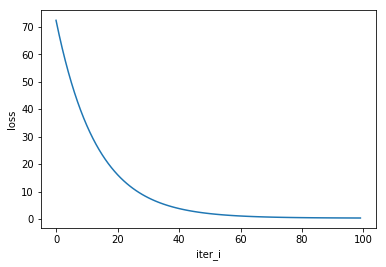

In [8]:
import scipy.optimize
from functools import partial

def loss_gradient(X, y, theta):
    X_prime = add_column(X)
    loss_grad = ((predict(X, theta) - y)*X_prime).mean(axis=0)[:, np.newaxis]
    return loss_grad
    
def run_gd(loss, loss_gradient, X, y, theta_init, lr=0.0001, n_iter=100):
    theta_current = theta_init.copy()
    loss_values = []
    theta_values = []
    
    for i in range(n_iter):
        loss_value = loss(X, y, theta_current)
        theta_current -= lr * loss_gradient(X, y, theta_current)
        loss_values.append(loss_value)
        theta_values.append(theta_current)
        
    return theta_current, loss_values, theta_values

result = run_gd(loss, loss_gradient, x, y, theta_init)
theta_est, loss_values, theta_values = result

print('estimated theta value', theta_est.ravel())
print('resulting loss', loss(x, y, theta_est))
plt.ylabel('loss')
plt.xlabel('iter_i')
plt.plot(loss_values)
plt.show()

# Cross Validation, 4 Fold

In [71]:
splited_tranining_set_idx = np.load('splited_training_set.npy')

In [72]:
K = 4
theta_init = np.zeros((203, 1))

In [73]:
CV_score = []
for i in range(K):
    current_train_idx = splited_tranining_set_idx[i][0]
    current_test_idx = splited_tranining_set_idx[i][1]
    X = x[current_train_idx]
    Y = y[current_train_idx]
    
    result = run_gd(loss, loss_gradient, X, Y, theta_init)
    theta_est, loss_values, theta_values = result
    
    X_ = x[current_test_idx]
    Y_ = predict(X_, theta_est)
    Y_real = y[current_test_idx]
    cuurent_score = np.sqrt(sum((Y_ - Y_real)**2)/len(Y_real))
    CV_score += [cuurent_score]

In [76]:
CV_score

[array([0.80216511]),
 array([0.81774946]),
 array([0.90413246]),
 array([0.78258087])]

In [90]:
np.mean(CV_score)

0.8266569767399814

In [ ]:
0.82665697